# 0. Introdução

A análise foi realizada utilizando a base de clientes da IBM que pode ser acessada no kaggle pelo link https://www.kaggle.com/datasets/blastchar/telco-customer-churn.

A motivação da análise é entender quais fatores levam o cliente ao churn (quando o cliente cancela o serviço em determinado período de tempo). Sabendo quais clientes estão propícios ao churn, a empresa pode destinar ações e oferecer descontos/melhorias para reter o cliente.

Algumas perguntas que tentaremos responder:
* Quantidade de clientes que deixaram o serviço?
* Distribuição por gênero?
* Distribuição por parceiros?
* Clientes possuem telefone? serviço de internet? Streaming de TV? Streaming de Filmes?
* Qual o método de pagamento mais comum entre os clientes?
* Qual o tipo de contrato mais comum entre os clientes? 
* O tipo do pagamento influência em cancelarem o serviço?
* O tipo de contrato influência em cancelarem o serviço?
* Clientes que pagam mais por mês, tem mais chance de cancelaram o serviço? e no total de gastos?
* Clientes que possuem mais tempo de utilização, tem menos chances de cancelar o contrato?


# 1. Importação das bibliotecas

In [407]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

# 2. Carregando a base

In [408]:
df_churn = pd.read_csv('telco_customer_churn.csv')

Visualizando os primeiros registros da base

In [409]:
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [410]:
df_churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Dividindo a base em treino e validação

In [411]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df_churn, test_size=0.2, random_state=0)

In [412]:
train_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2920,9453-PATOS,Female,0,Yes,No,72,Yes,No,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Mailed check,85.10,6155.4,No
2966,8648-PFRMP,Female,1,No,No,14,No,No phone service,DSL,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,46.35,672.7,No
6099,7711-GQBZC,Female,0,Yes,Yes,71,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),24.70,1810.55,No
5482,6289-CPNLD,Male,0,Yes,Yes,33,Yes,No,DSL,No,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,73.90,2405.05,Yes
2012,6845-RGTYS,Female,0,Yes,No,47,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,98.75,4533.7,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,4298-OYIFC,Male,0,Yes,No,15,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,103.45,1539.8,No
3264,6818-DJXAA,Female,0,No,Yes,10,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,No,Month-to-month,Yes,Electronic check,91.10,964.35,No
1653,6625-FLENO,Male,0,Yes,No,58,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.75,1185.95,No
2607,5539-TMZLF,Male,1,No,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,69.75,69.75,Yes


In [413]:
test_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2200,6296-DDOOR,Female,0,No,No,19,Yes,No,DSL,No,...,No,No,Yes,No,One year,No,Electronic check,58.20,1045.25,No
4627,3680-CTHUH,Male,0,No,No,60,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),116.60,7049.5,No
3225,4931-TRZWN,Female,0,No,No,13,Yes,No,DSL,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,71.95,923.85,No
2828,8559-WNQZS,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.45,20.45,No
3768,3537-HPKQT,Female,0,Yes,No,55,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),77.75,4266.4,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2631,6861-XWTWQ,Male,1,Yes,No,7,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.25,665.45,Yes
5333,3143-JQEGI,Female,0,Yes,Yes,13,Yes,No,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,88.35,1222.8,Yes
6972,6664-FPDAC,Female,1,No,No,56,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,111.95,6418.9,Yes
4598,4929-ROART,Male,0,No,No,18,Yes,Yes,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,56.25,969.85,No


# 3. Análise da base

Verificando a quantidade de linhas e colunas da base

In [414]:
print(f'A base possui {df_churn.shape[0]} linhas e {df_churn.shape[1]} colunas.')

A base possui 7043 linhas e 21 colunas.


Modificando o valor de TotalCharges para float.

In [415]:
df_churn['TotalCharges'] = pd.to_numeric(df_churn['TotalCharges'], errors='coerce')
train_df['TotalCharges'] = pd.to_numeric(train_df['TotalCharges'], errors='coerce')
test_df['TotalCharges'] = pd.to_numeric(test_df['TotalCharges'], errors='coerce')

Verificando as informações das variáveis.

In [416]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Verificando se existe algum valor nulo na base.

In [417]:
df_churn.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Como são poucas linhas nulas, vamoes remover elas.

In [418]:
 df_churn.dropna(axis = 0, inplace=True)
 train_df.dropna(axis = 0, inplace=True)
 test_df.dropna(axis = 0, inplace=True)

Verificando se existem valores duplicados na base.

In [419]:
print(f'Existem {df_churn.duplicated().sum()} duplicados na base.')

Existem 0 duplicados na base.


Análise estatística da base.

In [420]:
df_churn.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# 4. Análise univariada

**Quantidade de clientes que deixaram o serviço?**

In [421]:
left_df = df_churn[df_churn['Churn'] == 'Yes']
stayed_df = df_churn[df_churn['Churn'] == 'No']

In [422]:
print('Total = ', len(df_churn))
print('Número de clientes que saíram do serviço = ', len(left_df))
print('Porcentagem de clientes que saíram do serviço = ', (len(left_df) / len(df_churn)) * 100)
print('Número de clientes que continuaram com o serviço = ', len(stayed_df))
print('Porcentagem de clientes que continuaram com o serviço = ', (len(stayed_df) / len(df_churn)) * 100)

Total =  7032
Número de clientes que saíram do serviço =  1869
Porcentagem de clientes que saíram do serviço =  26.578498293515356
Número de clientes que continuaram com o serviço =  5163
Porcentagem de clientes que continuaram com o serviço =  73.42150170648463


Aproximadamente 26% dos clientes saíram do serviço.

**Verificando distribuições das variáveis numéricas**

array([[<Axes: title={'center': 'SeniorCitizen'}>,
        <Axes: title={'center': 'tenure'}>],
       [<Axes: title={'center': 'MonthlyCharges'}>,
        <Axes: title={'center': 'TotalCharges'}>]], dtype=object)

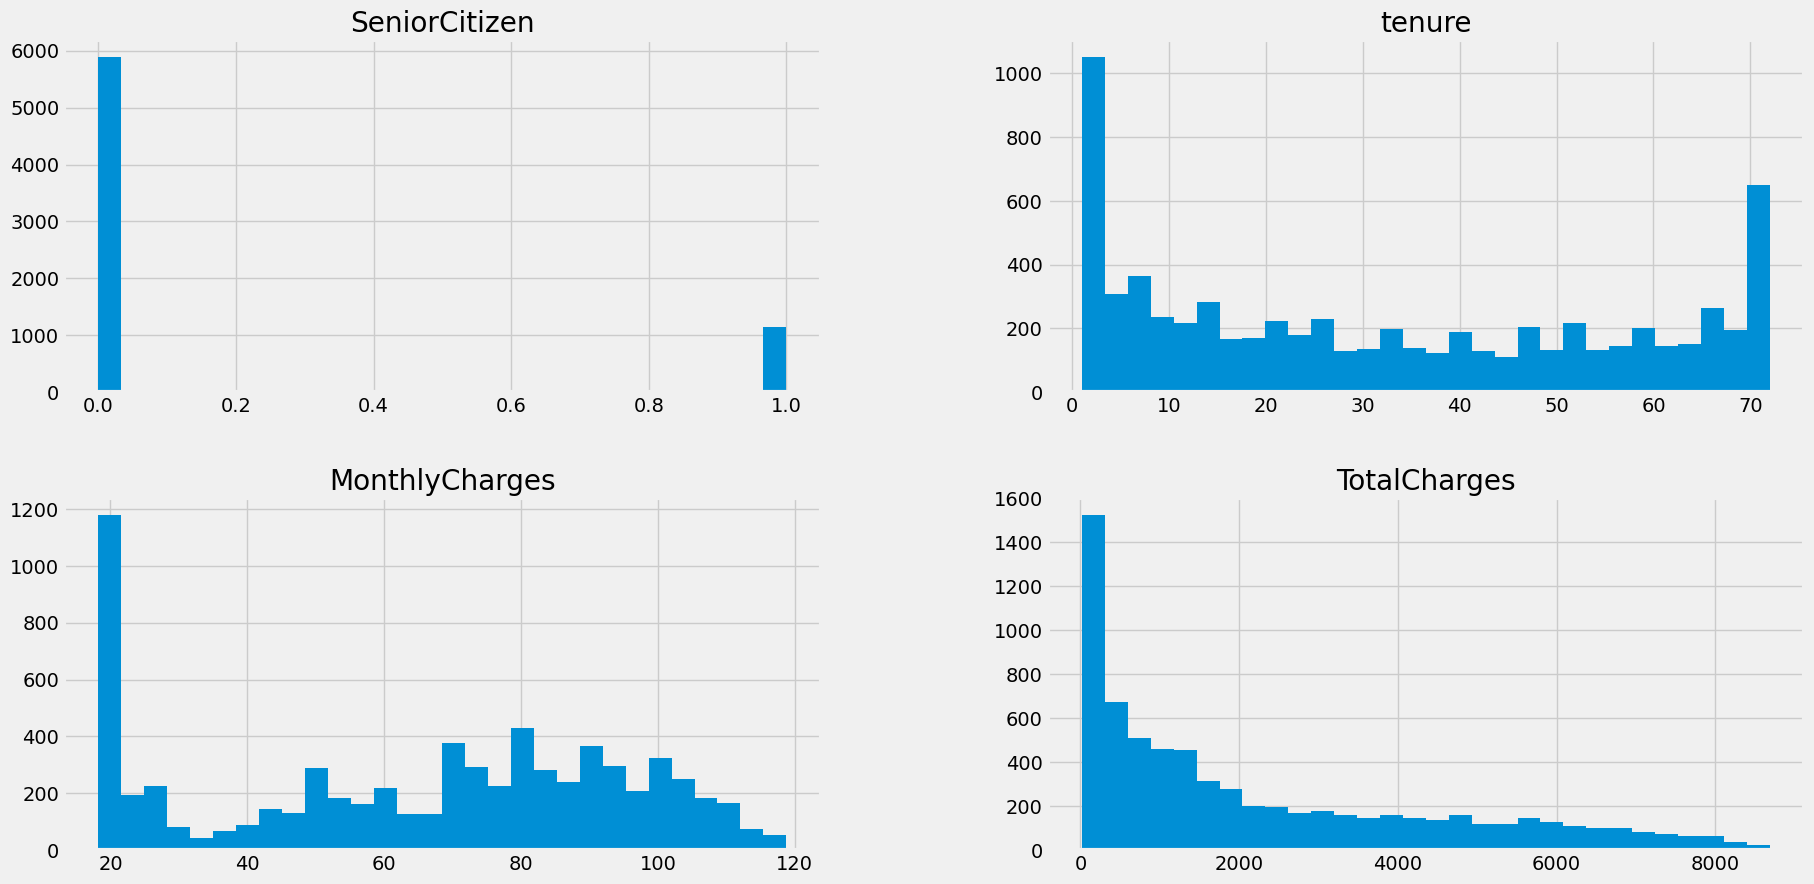

In [423]:
df_churn.hist(bins=30, figsize=(20,10))

**Distribuição por gênero?**

Text(0, 0.5, 'Total')

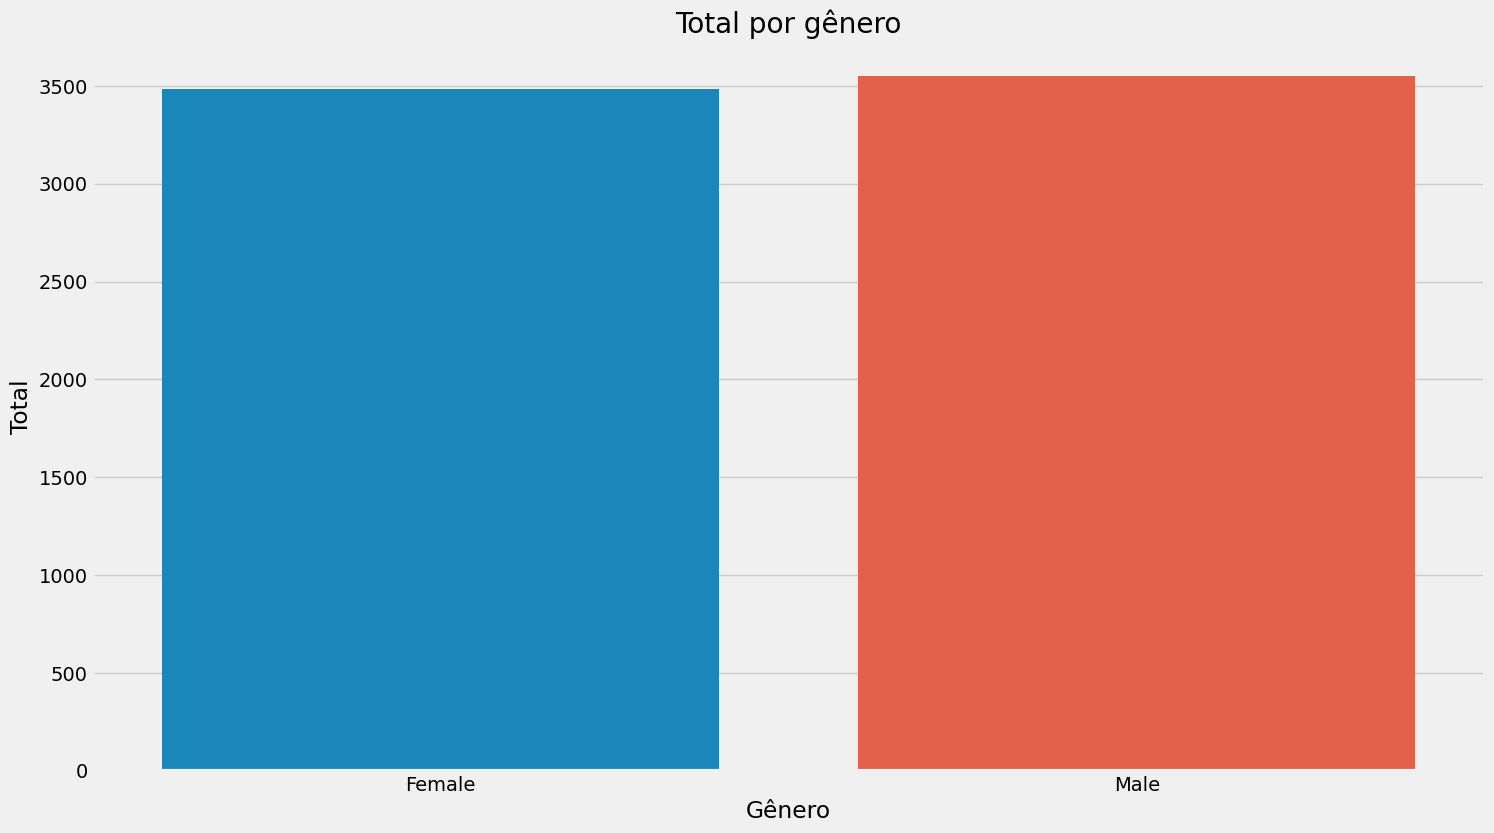

In [424]:
plt.figure(figsize=(16, 9))
sns.countplot(data = df_churn, x = 'gender')
plt.title('Total por gênero')
plt.xlabel('Gênero')
plt.ylabel('Total')

Podemos ver que é bem próxima a quantidade de homens e mulheres na base.

In [425]:
df_gender = df_churn['gender'].value_counts(1).reset_index()
df_gender = df_gender.rename({'index': 'gênero', 'gender': '%'}, axis=1)
df_gender

,gênero,%
0,Male,0.504693
1,Female,0.495307


Vendo por %, não chega nem 1% a mais na quantidade de homens para as mulheres.

**Distribuição por parceiros?**

Text(0, 0.5, 'Total')

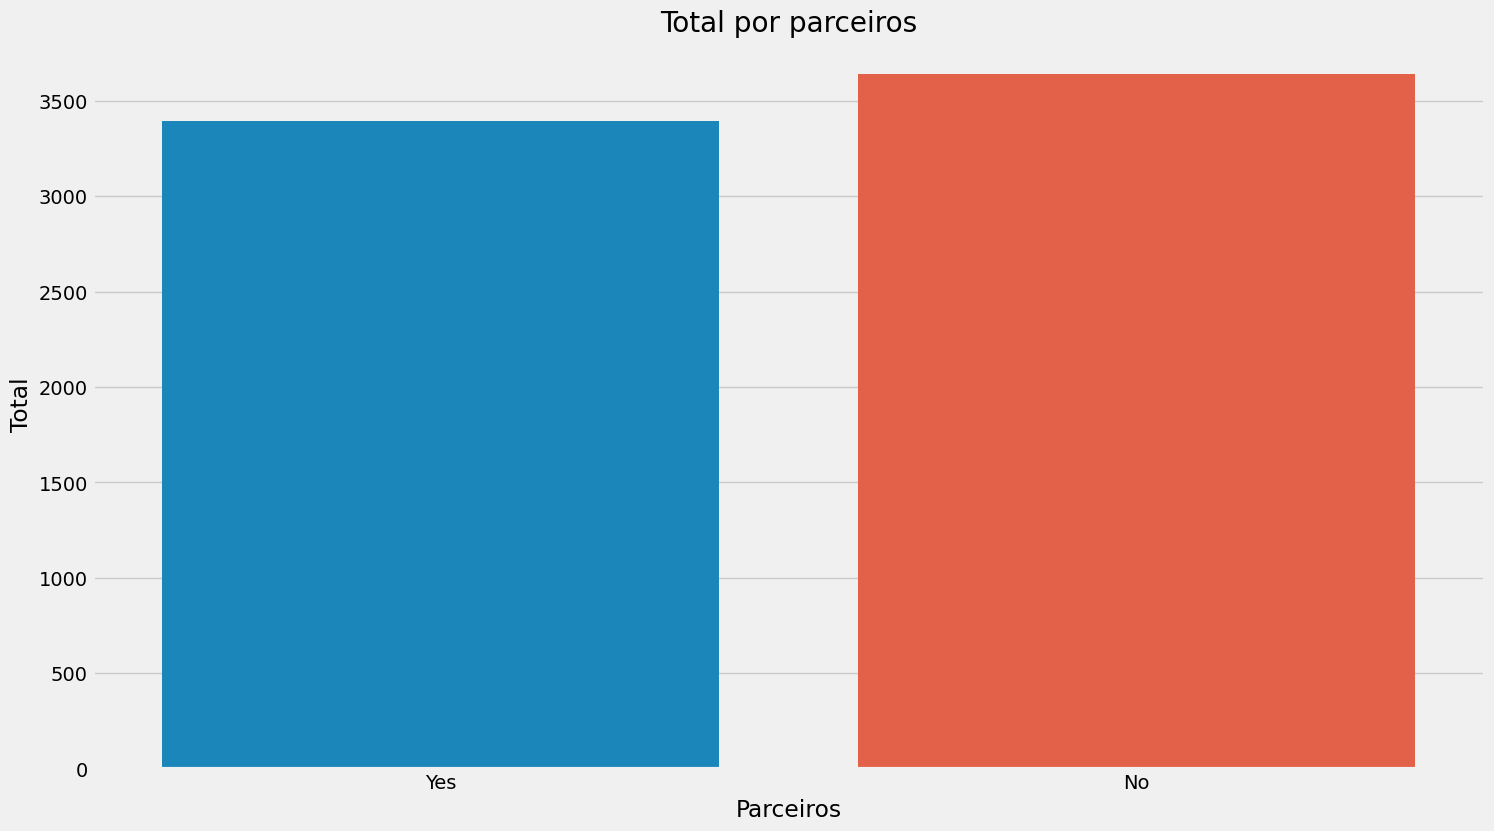

In [426]:
plt.figure(figsize=(16, 9))
sns.countplot(data = df_churn, x = 'Partner')
plt.title('Total por parceiros')
plt.xlabel('Parceiros')
plt.ylabel('Total')

Podemos ver que uma maior parte dos clientes não possui parceiros.

In [427]:
df_partner = df_churn['Partner'].value_counts(1).reset_index()
df_partner = df_partner.rename({'index': 'parceiros', 'Partner': '%'}, axis=1)
df_partner

,parceiros,%
0,No,0.517491
1,Yes,0.482509


É bem próxima também a quantidade de clientes que não possuem parceiros, cerca 3% a mais na quantidade apenas.

**Clientes possuem telefone? serviço de internet? Streaming de TV? Streaming de Filmes?**

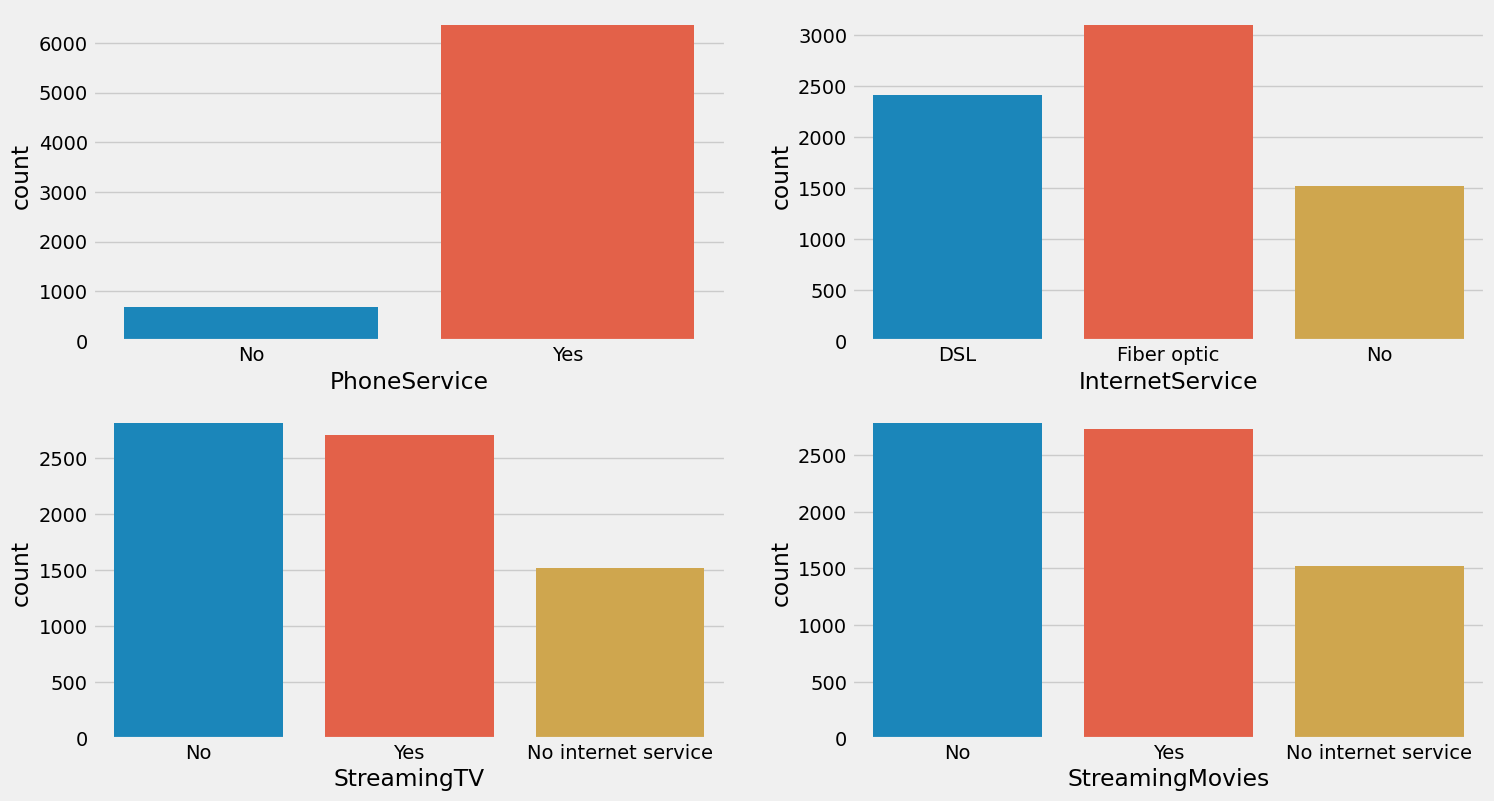

In [428]:
fig, axes = plt.subplots(2, 2, figsize=(16, 9))
_ = sns.countplot(data = df_churn, x = 'PhoneService', ax=axes[0][0])
_ = sns.countplot(data = df_churn, x = 'InternetService', ax=axes[0][1])
_ = sns.countplot(data = df_churn, x = 'StreamingTV', ax=axes[1][0])
_ = sns.countplot(data = df_churn, x = 'StreamingMovies', ax=axes[1][1])

Podemos ver que o perfil mais comum de cliente é ter um telefone, internet por fibra ótica, não possuir streaming de TV e nem de filmes.

**Qual o método de pagamento mais comum entre os clientes?**

Text(0, 0.5, 'Total')

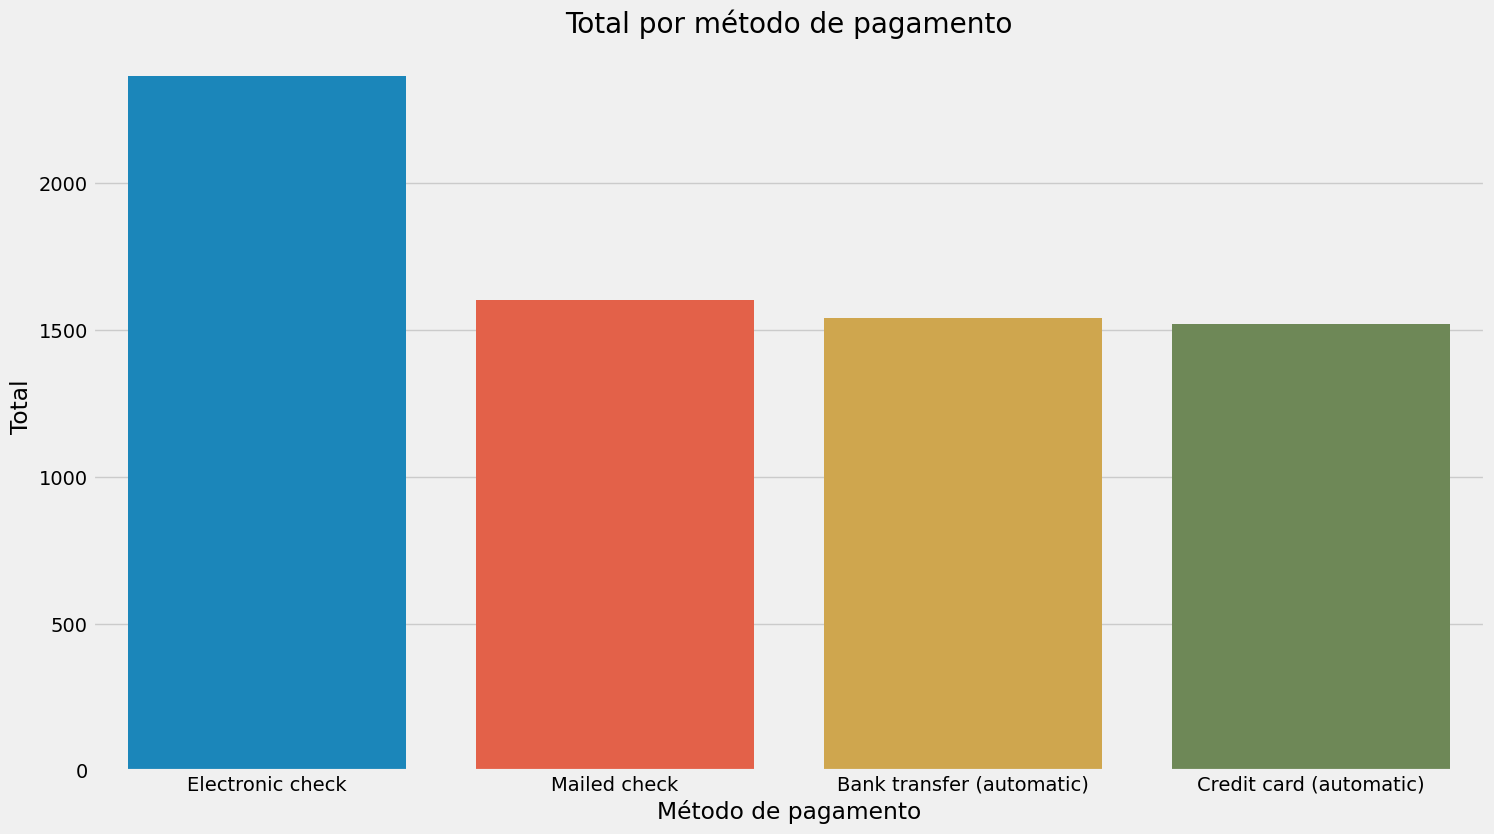

In [429]:
plt.figure(figsize=(16, 9))
sns.countplot(data = df_churn, x = 'PaymentMethod')
plt.title('Total por método de pagamento')
plt.xlabel('Método de pagamento')
plt.ylabel('Total')

A maioria dos clientes realiza pagamentos por boleto eletrônico.

In [430]:
df_payment_method = df_churn['PaymentMethod'].value_counts(1).reset_index()
df_payment_method = df_payment_method.rename({'index': 'método_pagamento', 'PaymentMethod': '%'}, axis=1)
df_payment_method

,método_pagamento,%
0,Electronic check,0.336320
1,Mailed check,0.228100
2,Bank transfer (automatic),0.219283
3,Credit card (automatic),0.216297


Cerca de 33% dos clientes realizam pagamentos por meio de boleto eletrônico e os outros tipos ficam bem equilibrados com cerca de 22% cada.

**Qual o tipo de contrato mais comum entre os clientes?**

Text(0, 0.5, 'Total')

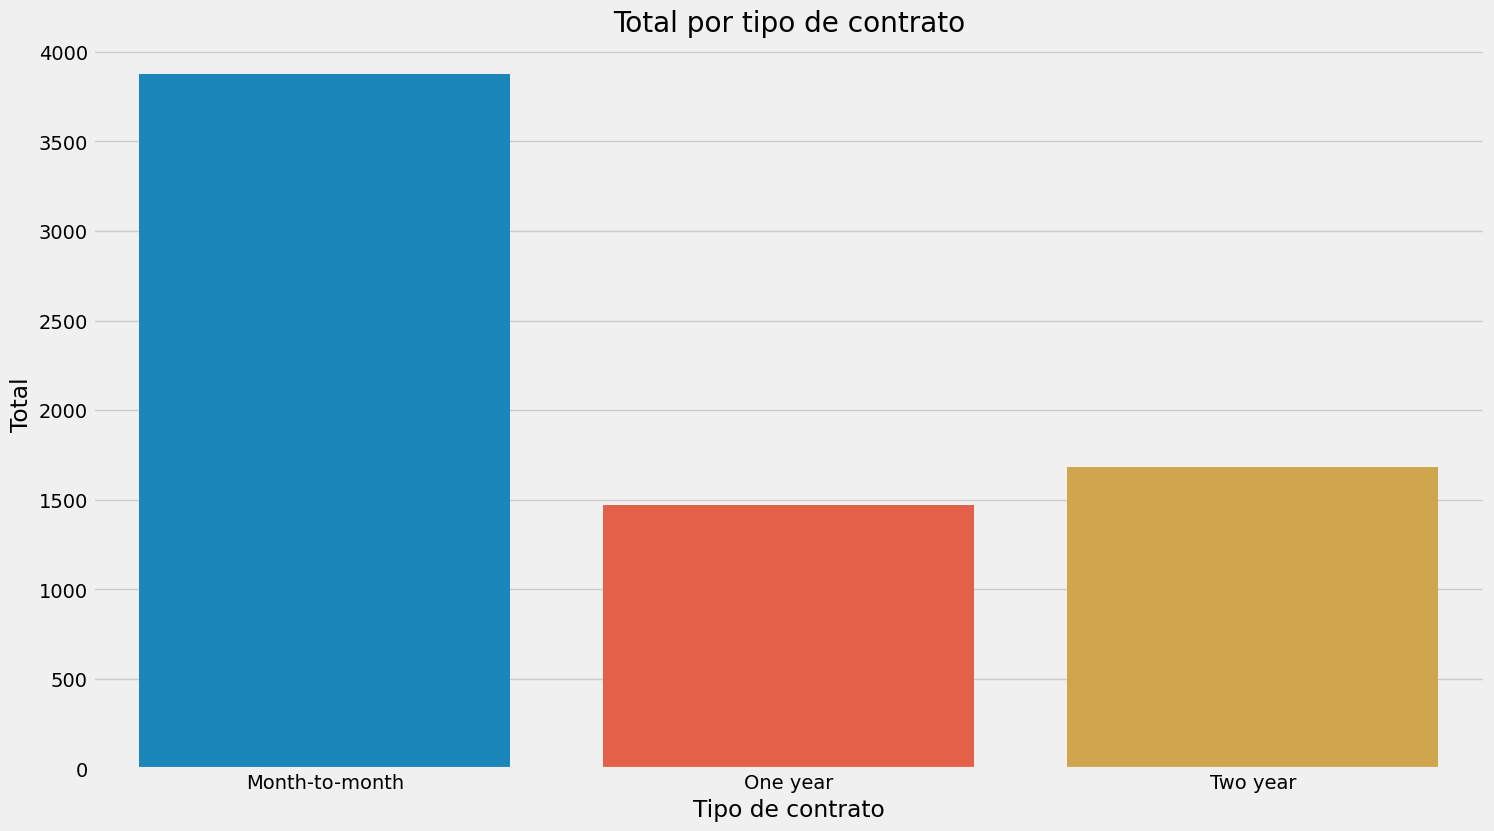

In [431]:
plt.figure(figsize=(16, 9))
sns.countplot(data = df_churn, x = 'Contract')
plt.title('Total por tipo de contrato')
plt.xlabel('Tipo de contrato')
plt.ylabel('Total')

A maioria dos clientes tem o contrato renovado mês a mês.

In [432]:
df_contract = df_churn['Contract'].value_counts(1).reset_index()
df_contract = df_contract.rename({'index': 'contrato', 'Contract': '%'}, axis=1)
df_contract

,contrato,%
0,Month-to-month,0.551052
1,Two year,0.239619
2,One year,0.209329


Mais de 50% dos clientes renova o contrato mês a mês, o que pode indicar uma saída mais fácil quando eles desejarem. apenas 44% dos clientes possuem contrato que duram pelo menos 1 anos, indicando uma pouca fidelização dos clientes.

# 5. Análise multivariada

**O tipo do pagamento influência em cancelarem o serviço?**

In [433]:
df2 = df_churn[['PaymentMethod', 'Contract', 'Churn']]
df2

,PaymentMethod,Contract,Churn
0,Electronic check,Month-to-month,No
1,Mailed check,One year,No
2,Mailed check,Month-to-month,Yes
3,Bank transfer (automatic),One year,No
4,Electronic check,Month-to-month,Yes
...,...,...,...
7038,Mailed check,One year,No
7039,Credit card (automatic),One year,No
7040,Electronic check,Month-to-month,No
7041,Mailed check,Month-to-month,Yes


Text(0, 0.5, 'Total')

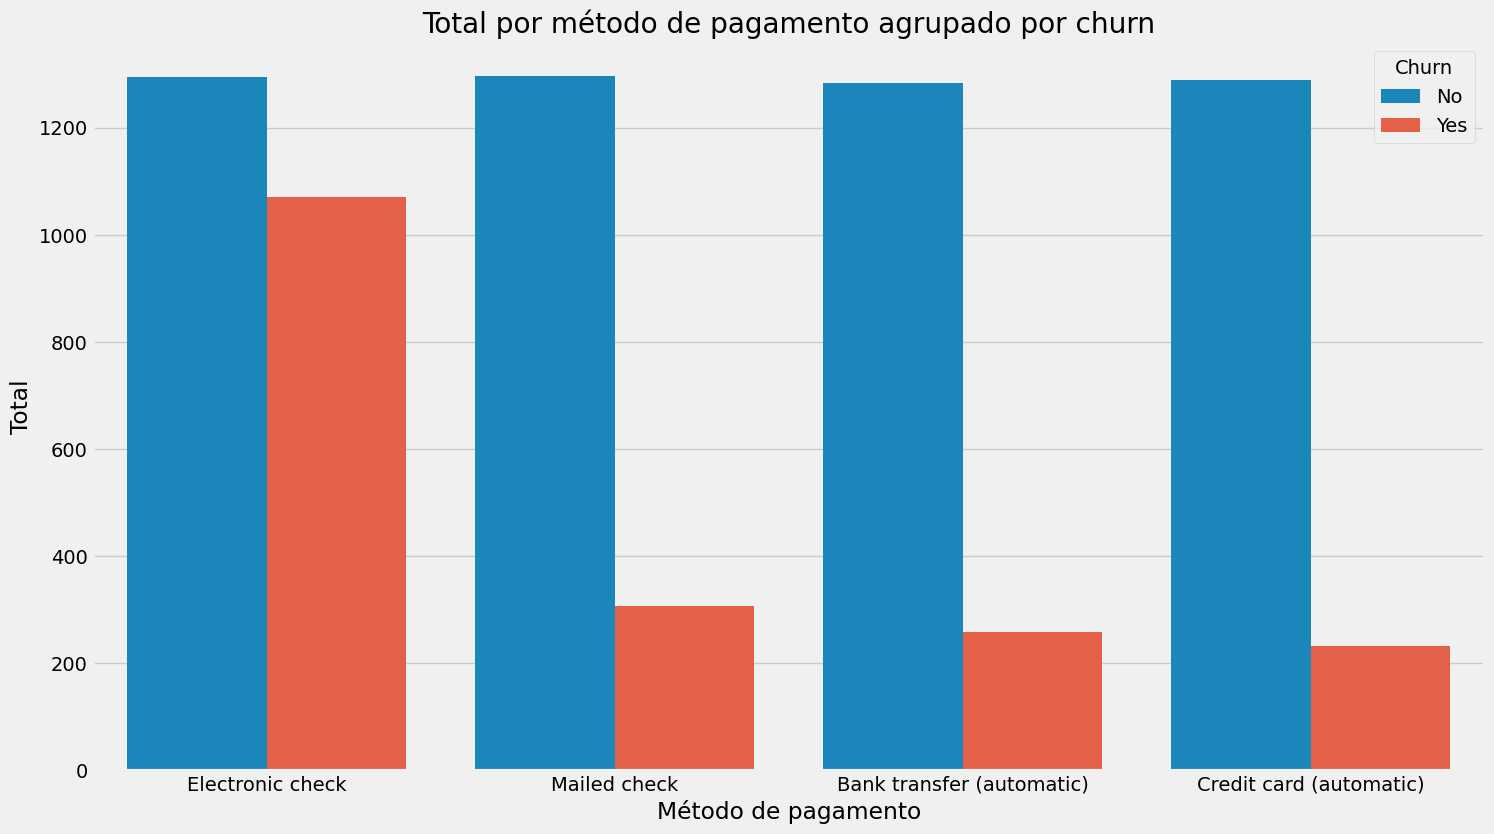

In [434]:
plt.figure(figsize=(16, 9))
sns.countplot(data=df2, x="PaymentMethod", hue="Churn")
plt.title('Total por método de pagamento agrupado por churn')
plt.xlabel('Método de pagamento')
plt.ylabel('Total')

Podemos ver que normalmente clientes que realizam pagamento por boleto eletrônico, acabam cancelando o serviço com mais frequência. Isso pode ter relação com o fato da maioria dos clientes preferir pagar o contrato mês a mês e normalmente o método de pagamento para esse caso é o boleto, o que facilita uma saida do serviço.

Relacionando o método de pagamento com o tipo de contrato

Text(0, 0.5, 'Total')

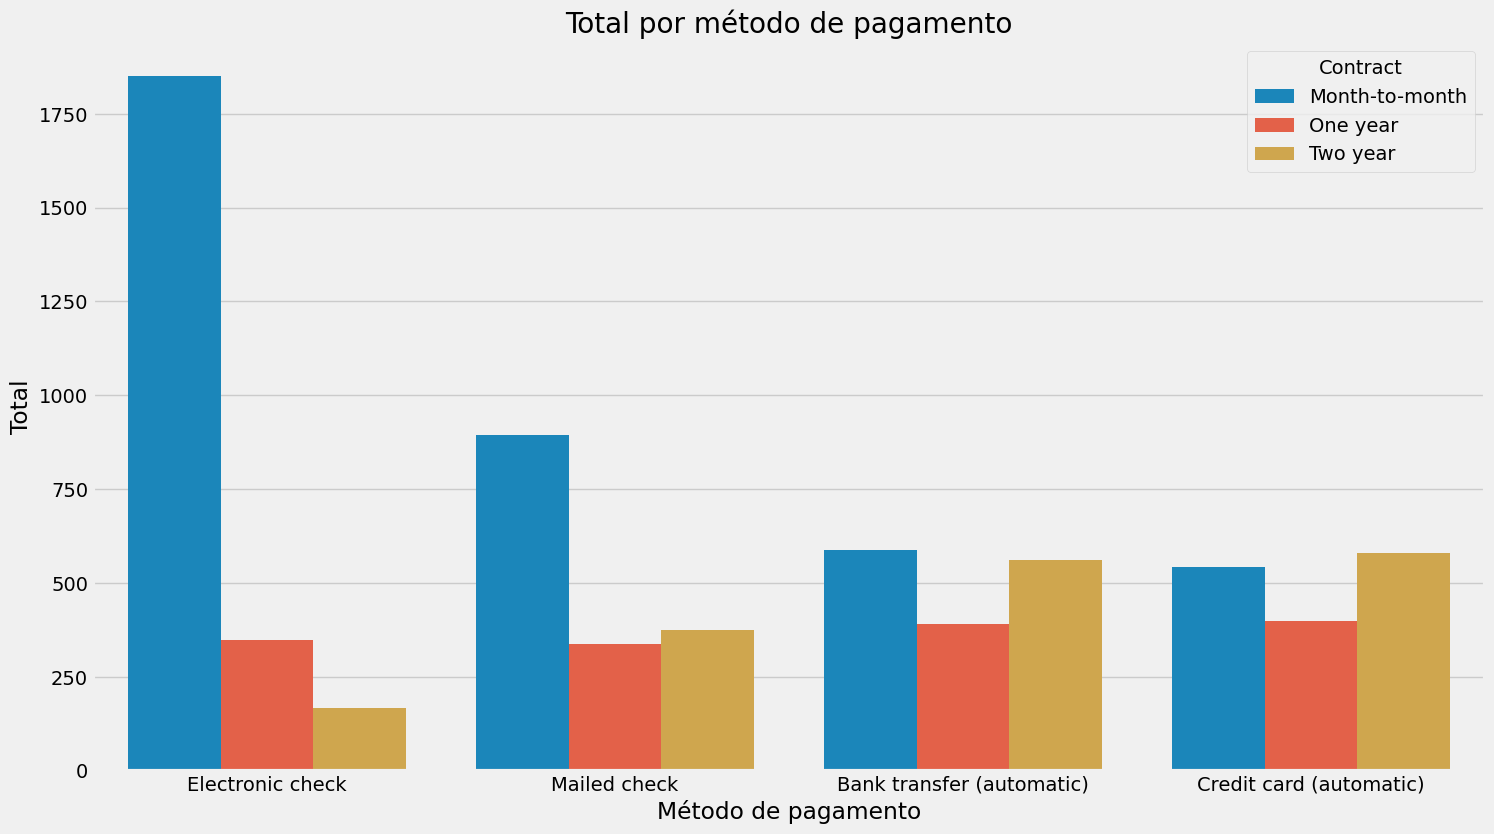

In [435]:
plt.figure(figsize=(16, 9))
sns.countplot(data=df2, x="PaymentMethod", hue="Contract")
plt.title('Total por método de pagamento')
plt.xlabel('Método de pagamento')
plt.ylabel('Total')

Conforme o esperado pela análise anterior, podemos ver que o tipo preferido de contrato para quem paga com boleto é o contrato de mês a mês com uma larga vantagem.

**O tipo de contrato influência em cancelarem o serviço?**

Text(0, 0.5, 'Total')

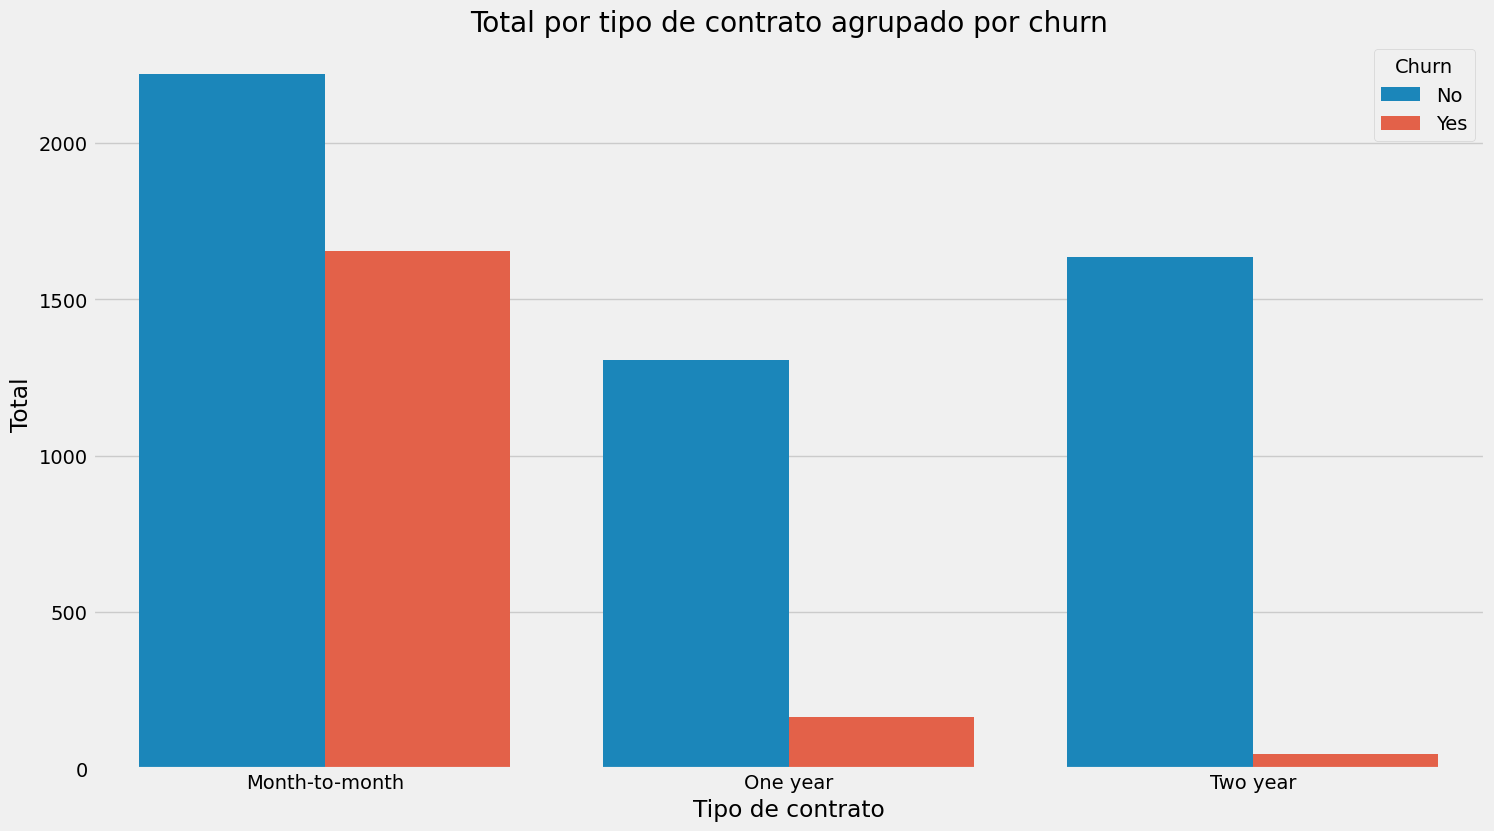

In [436]:
plt.figure(figsize=(16, 9))
sns.countplot(data=df2, x="Contract", hue="Churn")
plt.title('Total por tipo de contrato agrupado por churn')
plt.xlabel('Tipo de contrato')
plt.ylabel('Total')

Conforme esperado, clientes que possuem contrato renovado todo mês possui uma maior chance de fugir desse contrato do que clientes que possuem um contrato com maior duração, indicando uma fidelidade daquele cliente.

**Clientes que pagam mais por mês, tem mais chance de cancelaram o serviço? e no total de gastos?**

In [437]:
df3 = df_churn[['MonthlyCharges', 'TotalCharges', 'Churn']]
df3

,MonthlyCharges,TotalCharges,Churn
0,29.85,29.85,No
1,56.95,1889.50,No
2,53.85,108.15,Yes
3,42.30,1840.75,No
4,70.70,151.65,Yes
...,...,...,...
7038,84.80,1990.50,No
7039,103.20,7362.90,No
7040,29.60,346.45,No
7041,74.40,306.60,Yes


Text(0, 0.5, 'Densidade')

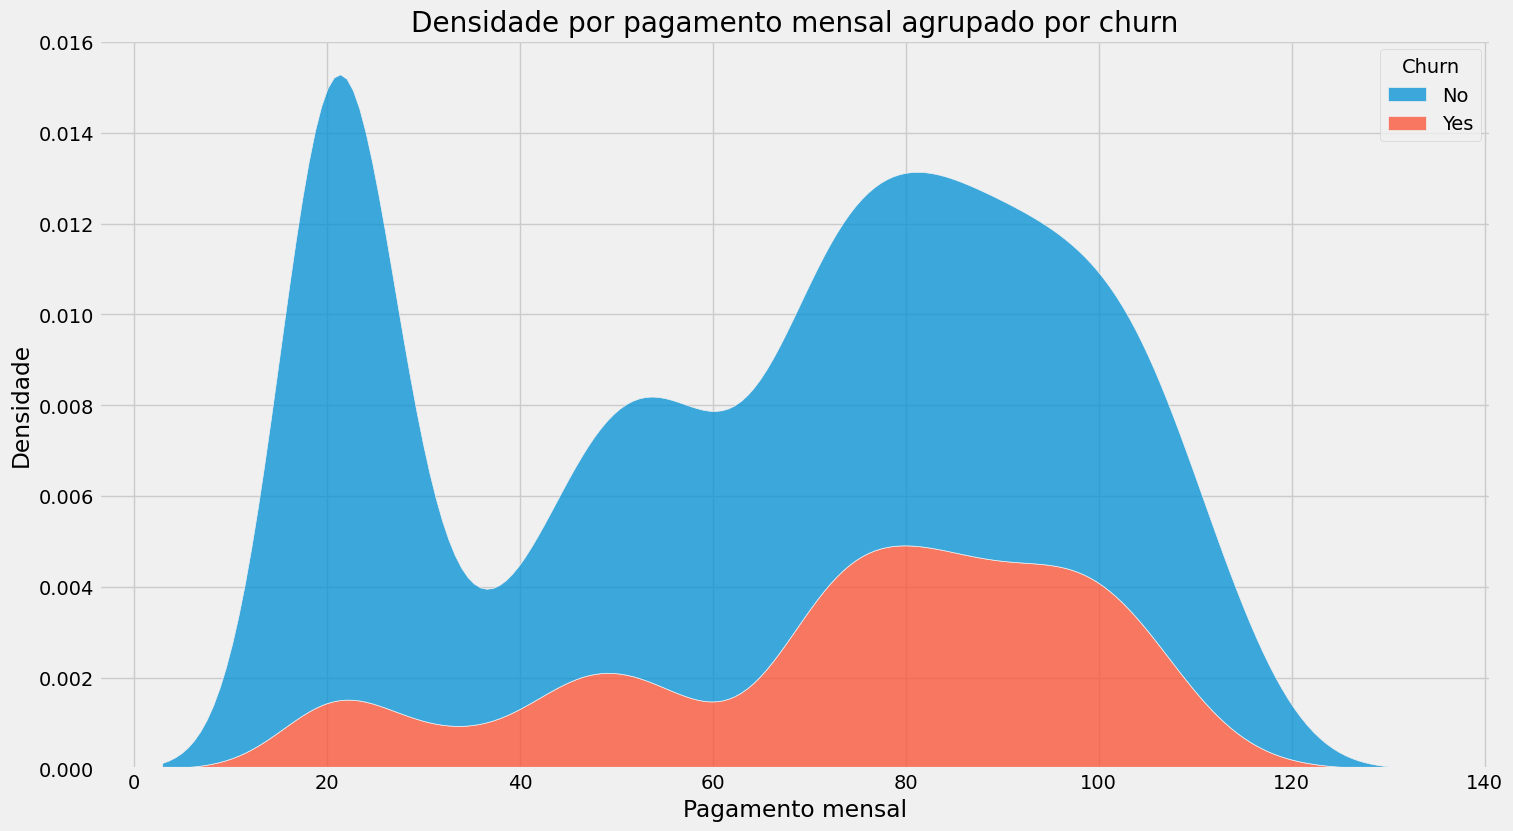

In [438]:
plt.figure(figsize=(16, 9))
sns.kdeplot(data=df3, x="MonthlyCharges", hue='Churn', multiple="stack")
plt.title('Densidade por pagamento mensal agrupado por churn')
plt.xlabel('Pagamento mensal')
plt.ylabel('Densidade')

Podemos ver que o cancelamento do serviço é mais alto conforme vai crescendo a taxa de pagamento mensal.

Text(0, 0.5, 'Densidade')

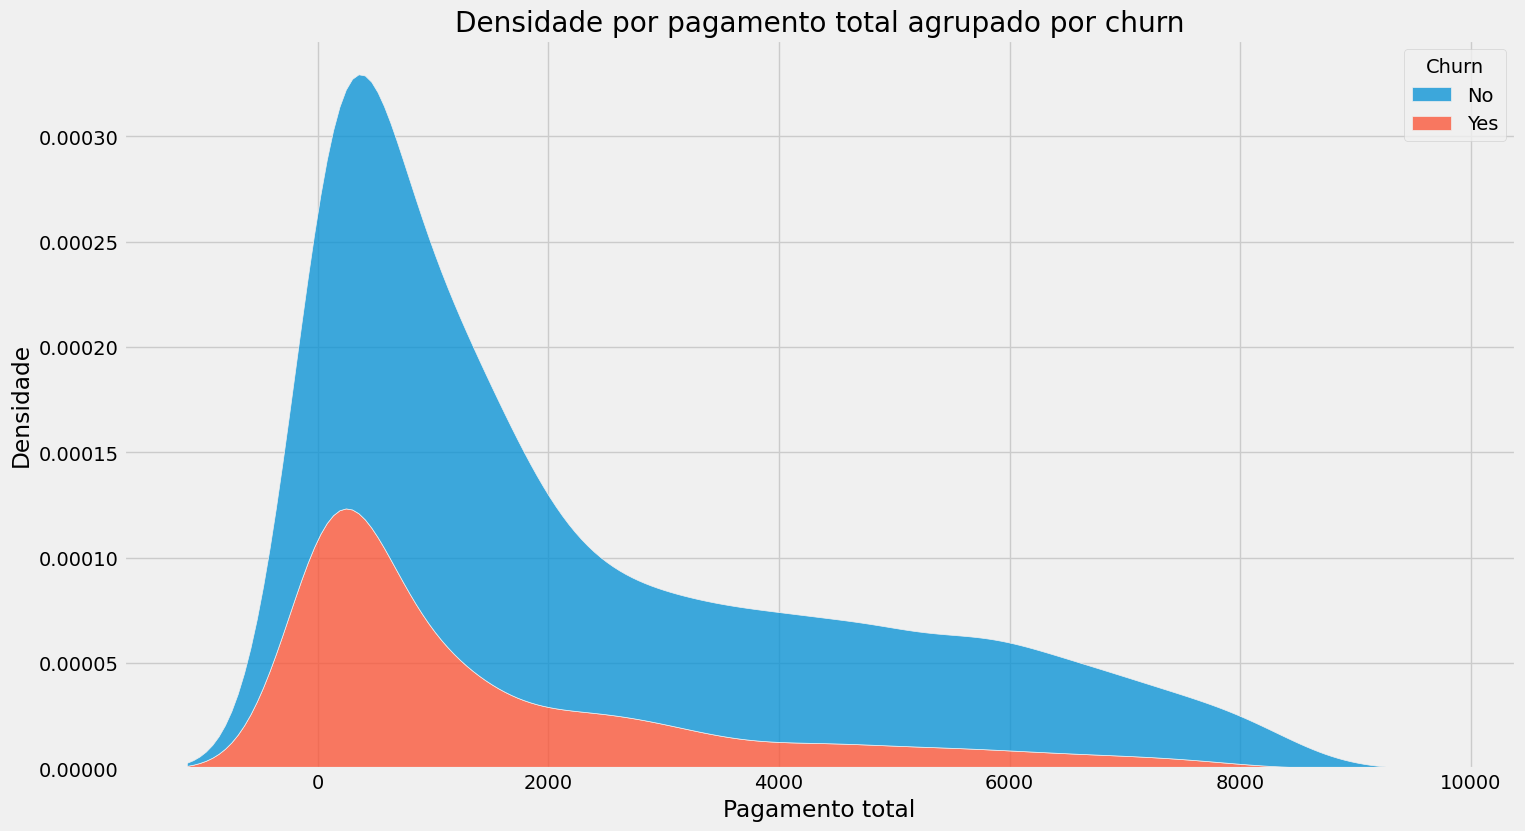

In [439]:
plt.figure(figsize=(16, 9))
sns.kdeplot(data=df3, x="TotalCharges", hue='Churn', multiple="stack")
plt.title('Densidade por pagamento total agrupado por churn')
plt.xlabel('Pagamento total')
plt.ylabel('Densidade')

Por pagamento total, o comportamento é inverso, temos um maior cancelamento do serviço quando a taxa de pagamento é mais baixa, indicando que os clientes tem uma tendência a deixar o serviço no começo, clientes que já utilizaram por mais perto e pagaram mais, acabam tendo uma tendência maior de continuar com ele.

**Clientes que possuem mais tempo de utilização, tem menos chances de cancelar o contrato?**

In [440]:
df4 = df_churn[['tenure', 'Churn']]
df4

,tenure,Churn
0,1,No
1,34,No
2,2,Yes
3,45,No
4,2,Yes
...,...,...
7038,24,No
7039,72,No
7040,11,No
7041,4,Yes


Text(0, 0.5, 'Total')

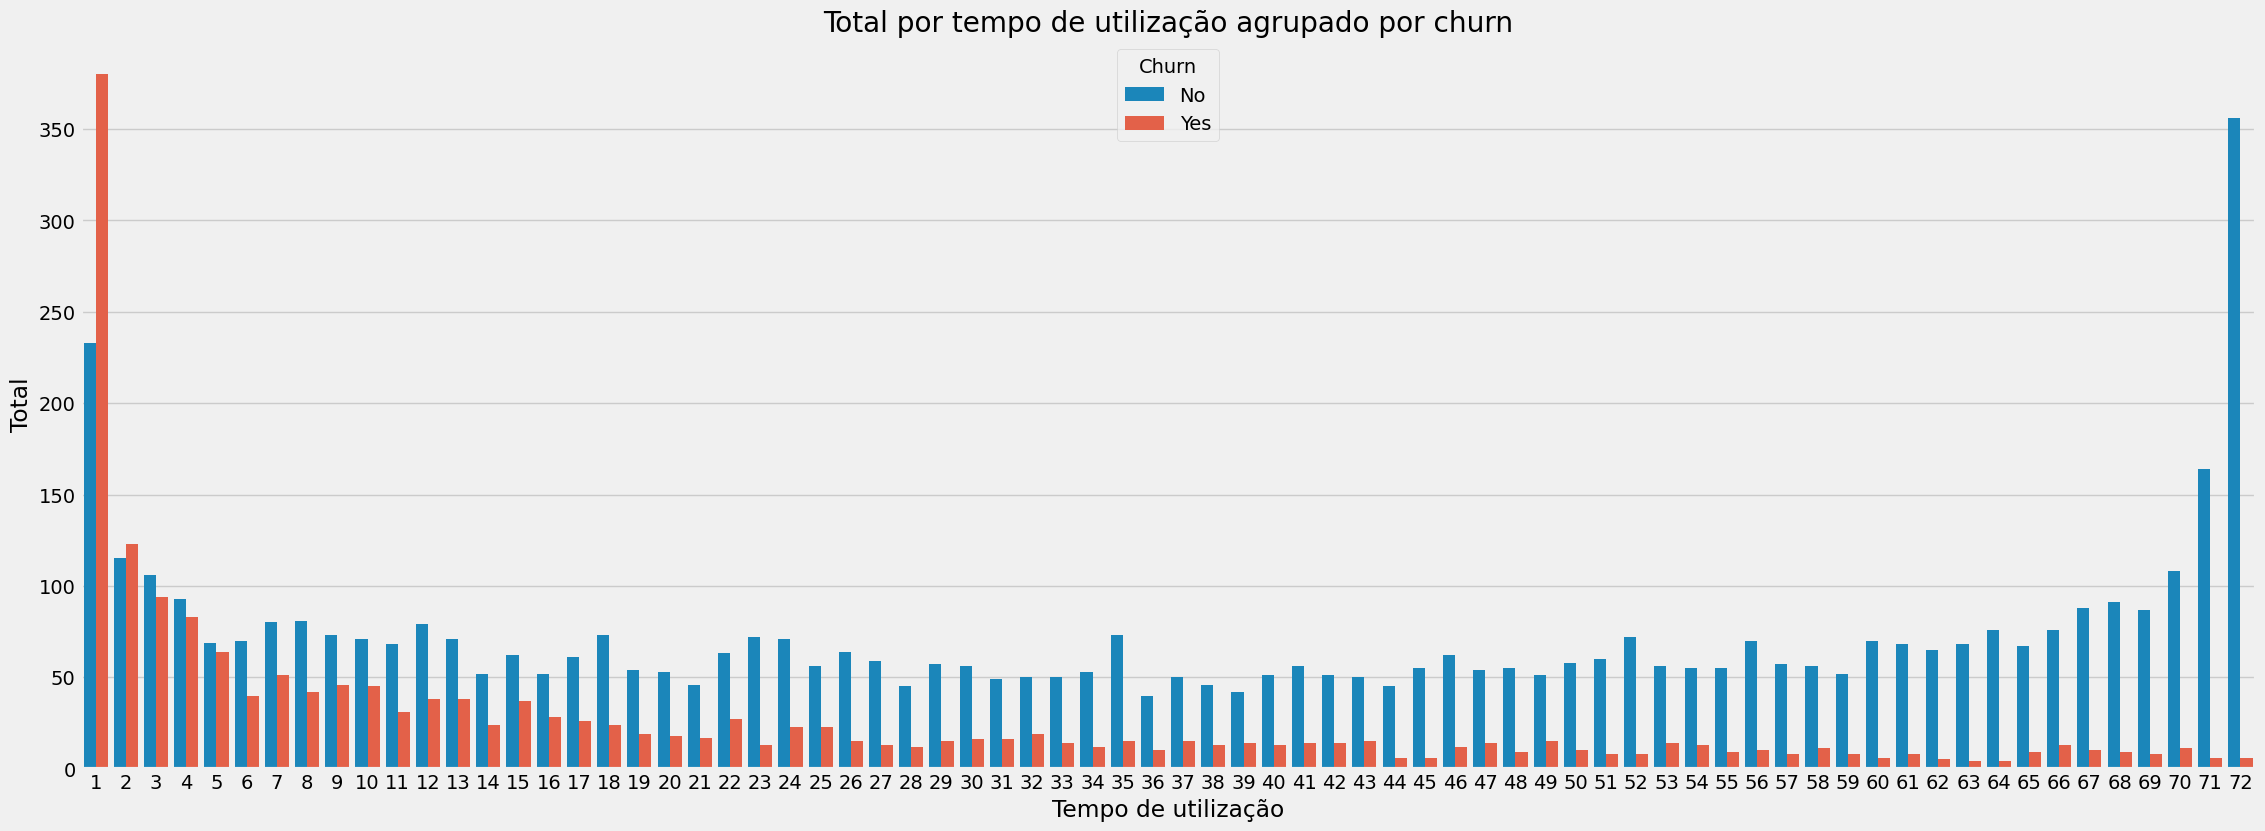

In [441]:
plt.figure(figsize=(25, 9))
sns.countplot(data=df4, x="tenure", hue='Churn')
plt.title('Total por tempo de utilização agrupado por churn')
plt.xlabel('Tempo de utilização')
plt.ylabel('Total')

Podemos ver que clientes com menos tempo de utilização, tem uma tendência maior a cancelar o serviço. Principalmente nos primeiros 5 meses. Isso é natural se considerarmos que a maioria dos clientes faz um contrato mensal e que possibilita uma saída mais rápida.

# 6. Pré processamento dos dados

Deletando a variável ID que não vai ser utilizada

In [442]:
train_df.drop('customerID', axis = 1, inplace = True)
test_df.drop('customerID', axis = 1, inplace = True)

Transformando a variável Churn em numérico

In [443]:
train_df['Churn'] = train_df['Churn'].map({"Yes": 1, "No": 0})
test_df['Churn'] = test_df['Churn'].map({"Yes": 1, "No": 0})

Dividindo a base em treino e teste

In [444]:
X_train, X_test, y_train, y_test = train_test_split(train_df.drop('Churn', axis=1), train_df['Churn'], test_size=0.2, random_state=0)

In [445]:
print(X_train.shape, X_test.shape)

(4500, 19) (1126, 19)


In [446]:
print(y_train.shape, y_test.shape)

(4500,) (1126,)


Pegando apenas as variáveis categóricas da base

In [447]:
s = train_df.dtypes == 'object'
object_cols = list(s[s].index)

print('Categorical variables: ')
print(object_cols)

Categorical variables: 
['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


Aplicando o one hot encoder nas variáveis categóricas

In [448]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown = 'ignore', sparse=False)
cat_train_df = pd.DataFrame(encoder.fit_transform(X_train[object_cols]))
cat_val_df = pd.DataFrame(encoder.transform(X_test[object_cols]))
cat_test_df = pd.DataFrame(encoder.transform(test_df[object_cols]))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Aplicando os indices originais

In [449]:
cat_train_df.index = X_train.index
cat_val_df.index = X_test.index
cat_test_df.index = test_df.index

Pegando apenas as variáveis numéricas e removendo a target

In [450]:
num_train_df = X_train.drop(object_cols, axis = 1)
num_val_df = X_test.drop(object_cols, axis = 1)
num_test_df = test_df.drop(object_cols, axis = 1)

Juntando as colunas categóricas e numéricas

In [451]:
encoded_df_train = pd.concat([num_train_df, cat_train_df], axis=1)
encoded_df_val = pd.concat([num_val_df, cat_val_df], axis=1)
encoded_df_test = pd.concat([num_test_df, cat_test_df], axis=1)

Transformando todas colunas em string

In [452]:
encoded_df_train.columns = encoded_df_train.columns.astype(str)
encoded_df_val.columns = encoded_df_val.columns.astype(str)
encoded_df_test.columns = encoded_df_test.columns.astype(str)

Verificando o dataset final

In [453]:
encoded_df_train

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,0,1,2,3,4,5,...,31,32,33,34,35,36,37,38,39,40
2227,0,58,19.55,1108.80,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3905,0,3,35.20,108.95,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5556,0,13,79.80,973.45,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3518,0,1,19.45,19.45,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3394,0,26,61.55,1581.95,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5273,0,69,20.15,1337.50,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
3820,1,72,112.90,8061.50,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1338,0,1,20.15,20.15,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4482,0,7,74.90,541.15,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [454]:
encoded_df_val

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,0,1,2,3,4,5,...,31,32,33,34,35,36,37,38,39,40
3278,0,65,79.40,5071.90,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
2336,0,17,70.40,1214.05,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1823,0,19,73.85,1424.50,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
6322,0,4,79.00,303.15,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5833,1,19,34.30,577.15,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,0,71,24.50,1816.20,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2221,0,71,64.05,4492.90,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4437,0,60,101.15,6067.40,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2985,0,35,113.20,3914.05,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


Fazendo o scale dos dados de treino

In [455]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = encoded_df_train
y = y_train

X = scaler.fit_transform(X)

print(X, y)

[[-0.43571395  1.03085483 -1.51348805 ... -0.52110041  1.41138984
  -0.55133462]
 [-0.43571395 -1.19263506 -0.99294977 ...  1.91901596 -0.70852147
  -0.55133462]
 [-0.43571395 -0.78836417  0.49050117 ... -0.52110041  1.41138984
  -0.55133462]
 ...
 [-0.43571395 -1.27348924 -1.49353131 ... -0.52110041 -0.70852147
   1.81378053]
 [-0.43571395 -1.0309267   0.32752113 ... -0.52110041  1.41138984
  -0.55133462]
 [-0.43571395 -0.82879126 -0.14645142 ... -0.52110041  1.41138984
  -0.55133462]] 2227    0
3905    1
5556    1
3518    0
3394    0
       ..
5273    0
3820    0
1338    1
4482    1
7036    0
Name: Churn, Length: 4500, dtype: int64


Fazendo o scale dos dados de teste

In [456]:
X_test = scaler.transform(encoded_df_val)
print(X_test)

[[-0.43571395  1.31384446  0.47719668 ... -0.52110041 -0.70852147
  -0.55133462]
 [-0.43571395 -0.62665581  0.17784559 ... -0.52110041 -0.70852147
  -0.55133462]
 [-0.43571395 -0.54580164  0.29259684 ...  1.91901596 -0.70852147
  -0.55133462]
 ...
 [-0.43571395  1.11170901  1.20062847 ...  1.91901596 -0.70852147
  -0.55133462]
 [-0.43571395  0.10103179  1.60142631 ... -0.52110041 -0.70852147
   1.81378053]
 [-0.43571395 -1.11178088 -1.02454794 ... -0.52110041  1.41138984
  -0.55133462]]


# 7. Aplicação dos modelos

Criando a função de validação

In [457]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

def validation(test, predicted):
  acc = accuracy_score(test, predicted)
  cm = confusion_matrix(test, predicted)
  cr = classification_report(test, predicted)

  print(f'A acurácia do modelo foi {acc}')
  print(cr)
  sns.heatmap(cm, annot=True, fmt=',d')

**Regressão logística**

In [458]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(X, y)

y_pred_logistic = logistic.predict(X_test)

A acurácia do modelo foi 0.8001776198934281
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       814
           1       0.67      0.55      0.60       312

    accuracy                           0.80      1126
   macro avg       0.75      0.72      0.73      1126
weighted avg       0.79      0.80      0.79      1126



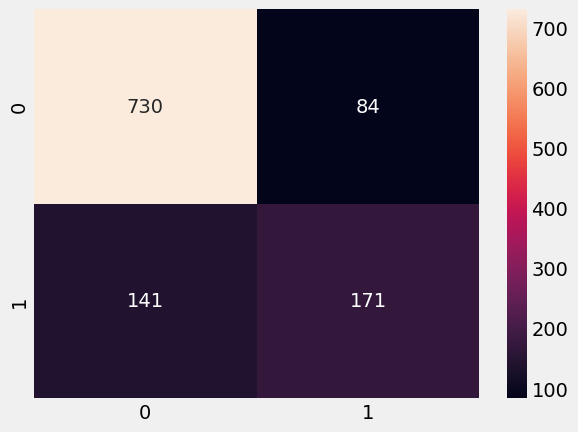

In [459]:
validation(y_test, y_pred_logistic)

**Random forest**

In [460]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
forest = forest.fit(X, y)
y_pred_forest = forest.predict(X_test)

A acurácia do modelo foi 0.7939609236234458
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       814
           1       0.66      0.52      0.58       312

    accuracy                           0.79      1126
   macro avg       0.75      0.71      0.72      1126
weighted avg       0.78      0.79      0.79      1126



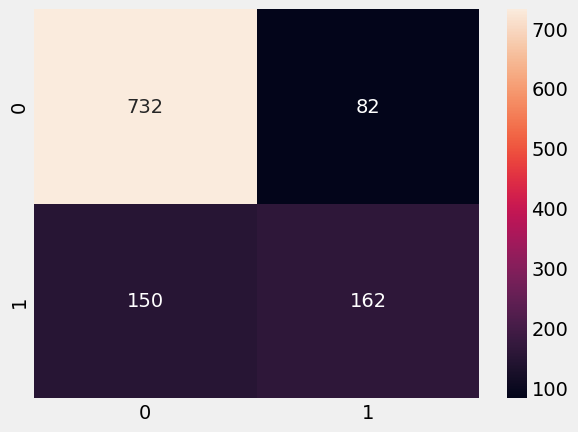

In [461]:
validation(y_test, y_pred_forest)

**Naive Bayes**

In [462]:
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()
naive_bayes = naive_bayes.fit(X, y)
y_pred_naive = naive_bayes.predict(X_test)

A acurácia do modelo foi 0.7060390763765542
              precision    recall  f1-score   support

           0       0.92      0.65      0.76       814
           1       0.48      0.84      0.61       312

    accuracy                           0.71      1126
   macro avg       0.70      0.75      0.69      1126
weighted avg       0.80      0.71      0.72      1126



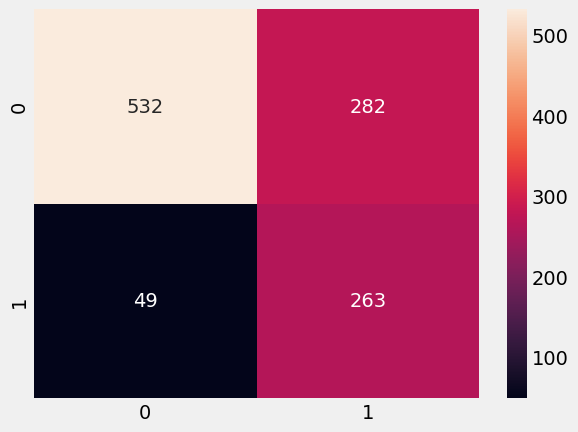

In [463]:
validation(y_test, y_pred_naive)

**KNN**

In [464]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn = knn.fit(X, y)
y_pred_knn = knn.predict(X_test)

A acurácia do modelo foi 0.7637655417406749
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       814
           1       0.58      0.54      0.56       312

    accuracy                           0.76      1126
   macro avg       0.70      0.70      0.70      1126
weighted avg       0.76      0.76      0.76      1126



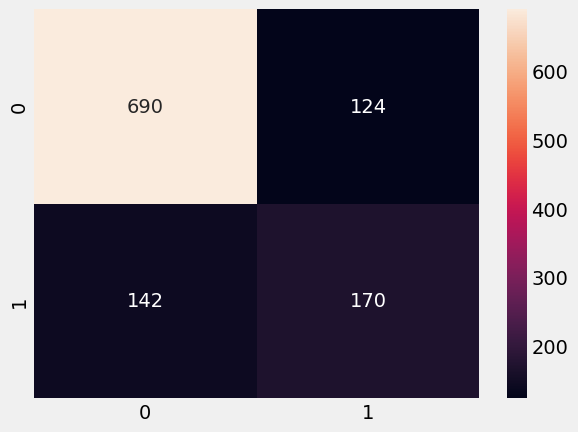

In [465]:
validation(y_test, y_pred_knn)

# 8. Testando o modelo numa base nova

In [466]:
X = encoded_df_test.drop('Churn', axis=1)
y = encoded_df_test['Churn']

X = scaler.transform(X)

print(X, y)

[[-0.43571395 -0.54580164 -0.22794144 ... -0.52110041  1.41138984
  -0.55133462]
 [-0.43571395  1.11170901  1.7145145  ...  1.91901596 -0.70852147
  -0.55133462]
 [-0.43571395 -0.78836417  0.2294005  ... -0.52110041  1.41138984
  -0.55133462]
 ...
 [ 2.29508376  0.95000066  1.55984977 ... -0.52110041  1.41138984
  -0.55133462]
 [-0.43571395 -0.58622873 -0.29280084 ... -0.52110041 -0.70852147
   1.81378053]
 [-0.43571395 -1.27348924 -0.64038071 ... -0.52110041 -0.70852147
   1.81378053]] 2200    0
4627    0
3225    0
2828    0
3768    0
       ..
2631    1
5333    1
6972    1
4598    0
3065    0
Name: Churn, Length: 1406, dtype: int64


Utilizando o modelo com o melhor resultado

In [467]:
y_new_pred = naive_bayes.predict(X)

Checando com os valores reais para ver quanto o modelo está acertando

A acurácia do modelo foi 0.6884779516358464
              precision    recall  f1-score   support

           0       0.91      0.64      0.75      1038
           1       0.45      0.83      0.58       368

    accuracy                           0.69      1406
   macro avg       0.68      0.73      0.67      1406
weighted avg       0.79      0.69      0.71      1406



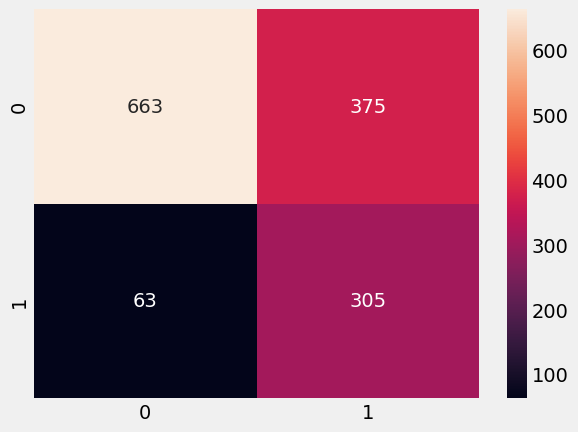

In [468]:
validation(y, y_new_pred)

O modelo continua com uma acurácia muito boa com dados novos que ele ainda não conhecia, atingindo 83% de recall que é a métrica indicada para o nosso target. No caso ele encontrou 306 casos que o cliente poderia deixar o serviço e deixou de identificar 62, o que é uma acurácia muito boa. Com isso poderíamos tentar evitar que esses clientes deixem de utilizar o serviço direcionando ações ou descontos específicos para eles continuarem utilizando.

# 9. Conclusão

Realizando a análise da base podemos chegar a algumas conclusões:
* Os genêros estão equilibrados, possuímos cerca de 50,4 % de mulheres e 49,6% de homens.
* Uma pequena maioria não possui parceiros, cerca de 51,7%.
* O perfil mais comum de cliente é ter um telefone, internet por fibra ótica, não possuir streaming de TV e nem de filmes. 
* O método preferido de pagamento é o boleto eletrônico, 33% dos clientes preferem isso.
* O tipo de contrato preferido é o renovado mensalmente, 55% dos clientes preferem utilizar ele, o que mostra uma dificuldade na fidelização do cliente.
* A maioria dos clientes que cancelou o serviço, utilizam o método de pagamento por boleto eletrônico, isso se dá pelo motivo de esse ser o método mais comum entre quem paga mensalmente, sendo mais fácil sair do serviço quando quiser.
* O tipo de contrato mais comum entre os clientes que sairam do serviço, é o contrato mensal conforme esperado. Os clientes que possuem contrato anual, possuem uma taxa baixissíma de cancelamento.
* Os clientes que mais saíram do serviço são aqueles que possuem uma taxa mensal mais alta.
* Em contrapartida, clientes que possuem uma taxa total de pagamento menor deixam mais o serviço. Isso pode indicar que são clientes que não utilizaram por muito tempo o serviço, acabam saindo antes de terem gastado mais dinheiro.
* Clientes tem uma tendência grande de sair do serviço no primeiro mês e isso vai diminuindo com o passar do tempo, ou seja, quanto mais tempo de serviço, menor as chances de saída. Então o ideal seria identificar quais clientes tem essa chance para já oferecer boas condições para o cliente não deixar o serviço após o primeiro mês.

Foi realizada a aplicação dos modelos de machine learning e o que melhor se comportou foi o naive bayes, atigindo 84% de recall com os dados de teste. Com dados desconhecidos atingiu 83% de recall, indicando uma boa acurácia para aquilo que tentamos encontrar. A cada 100 funcionários que poderiam deixar o serviço, ele está conseguindo identificar 84 corretamente e dando uma chance para tentar impedir que esses clientes deixem o serviço.